# Project: TMDb Movie Dataset Investigation

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#limitations">Limitations</a></li>
</ul>

<a id='intro'></a>
## Introduction


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
# Loading dataset
tmdb_movies = pd.read_csv('tmdb-movies.csv')
tmdb_movies.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


> In the above section, We loaded the dataset and displayed the first five rows in the dataset. The reason for displaying the first rows is to get a clear picture of the actual structure of the data in the dataset

In [3]:
tmdb_movies.shape

(10866, 21)

> From the above, we have checked the shape of the dataset to know the number of columns and rows found in the dataset. Thus, the dataset contains 10,866 rows and 21 columns

In [4]:
tmdb_movies.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


> In this section, we have loaded the descriptive statistics of data in the dataset. From the above information, it shows that; some of the movies in the dataset contains null values and missing values i.e. alot of zero values are recorded in the budget and revenue as accounted to atleast 50% of each column. Some zero values were recorded in the runtime column. The information also shows that 1960 is the minimum release year of the movies. The movies popularity ranges from 0.000065 to 32.985763 this means that the more higher the popularity index, the more popular the movie.

In [5]:
tmdb_movies.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

> The above information shows that the dataset contains null values or missing values in cast, homepage,director, tagline, keywords, overview, genres and production_companies columns

> **Info**: In the following section we shall be cleaning our dataset to remove any unnecessary columns and filling any unfilled gaps

### Data Cleaning

In [6]:
# Duplicating dataset
tmdb_movies_copy = tmdb_movies.copy()
# Dropping unnecessary columns
tmdb_movies_copy.drop(['overview', 'homepage', 'cast', 'director', 'tagline', 'keywords', 'production_companies', 'release_date', 'budget_adj', 'original_title', 'runtime', 'imdb_id', 'vote_count', 'vote_average'], axis=1,inplace=True)
tmdb_movies_copy.head()

,id,popularity,budget,revenue,genres,release_year,revenue_adj
0,135397,32.985763,150000000,1513528810,Action|Adventure|Science Fiction|Thriller,2015,1.392446e+09
1,76341,28.419936,150000000,378436354,Action|Adventure|Science Fiction|Thriller,2015,3.481613e+08
2,262500,13.112507,110000000,295238201,Adventure|Science Fiction|Thriller,2015,2.716190e+08
3,140607,11.173104,200000000,2068178225,Action|Adventure|Science Fiction|Fantasy,2015,1.902723e+09
4,168259,9.335014,190000000,1506249360,Action|Crime|Thriller,2015,1.385749e+09


> In the above section, we made a copy of the dataset to ensure that the changes we make to the dataset do not affect the original dataset. We also dropped a few columns that we may not be interested in at the moment. We then displayed the first five rows of the new structure to get a clear look.

In [7]:
# Drop duplicate rows
tmdb_movies_copy.drop_duplicates(keep='first', inplace=True)

> In the above section, we have removed any rows which could have been duplicated and kept their first occurances. This is to ensure that we make a clear unbiased analysis of the dataset.
In the next section we are removing the rows with zero values in the budget and revenue columns

In [8]:
## Removing movies with zero revenue and budget
temp_columns = ['budget', 'revenue']

# replacing 0 value with NAN 
tmdb_movies_copy[temp_columns] = tmdb_movies_copy[temp_columns].replace(0, np.NAN)

# Removing all rows with NaN value
tmdb_movies_copy.dropna(subset=temp_columns, inplace=True)

In the above section, we have dropped null values based in the budget and revenue columns

In [9]:
tmdb_movies_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3854 entries, 0 to 10848
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            3854 non-null   int64  
 1   popularity    3854 non-null   float64
 2   budget        3854 non-null   float64
 3   revenue       3854 non-null   float64
 4   genres        3854 non-null   object 
 5   release_year  3854 non-null   int64  
 6   revenue_adj   3854 non-null   float64
dtypes: float64(4), int64(2), object(1)
memory usage: 240.9+ KB


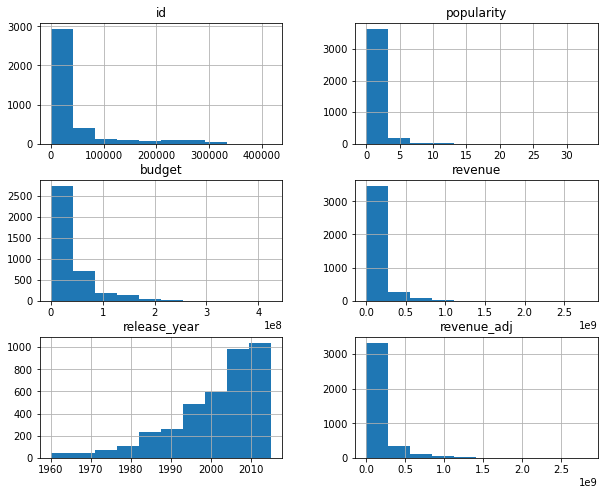

In [10]:
tmdb_movies_copy.hist(figsize=(10,8));

In [11]:
# Display items with missing genres
tmdb_movies_copy[tmdb_movies_copy.genres.isnull()]

,id,popularity,budget,revenue,genres,release_year,revenue_adj


> Given the fact that in the beginning we saw some null values in the genres column, this section was to double check and make sure that we don't have those rows and if any null genre value was to be found, any of the two options could be considered, deleting the null value rows or filling the null genre values with "nogenre"

In [12]:
# Replacing null genres with nogenre
# tmdb_movies_copy.fillna("nogenre", inplace=True)
# tmdb_movies_copy.info()

<a id='eda'></a>
## Exploratory Data Analysis

### Question 1: What are the Genres found in the dataset?

In [13]:
# Investigating the genres in the dataset
tmdb_movies_genres = tmdb_movies_copy['genres'].value_counts()
tmdb_movies_genres = pd.DataFrame(tmdb_movies_genres).reset_index()
tmdb_movies_genres.columns = ['genres', 'count']
tmdb_movies_genres.head()
# tmdb_movies_genres.head().hist();


,genres,count
0,Drama,245
1,Comedy,233
2,Drama|Romance,107
3,Comedy|Romance,104
4,Comedy|Drama|Romance,91


In [14]:
## Evaluating unique single genres
## The function takes in 3 params; 
## df = dataframe to be used
## col = column to be considered
## separator = the separator to used in the split data in that particular column
def split_data(df, col, separator):
    data = df[col].str.cat(sep=separator)
    data = pd.Series(data.split(separator))
    data_count = data.value_counts(ascending = False)
    return data_count

Text(0.5, 1.0, 'Genres count')

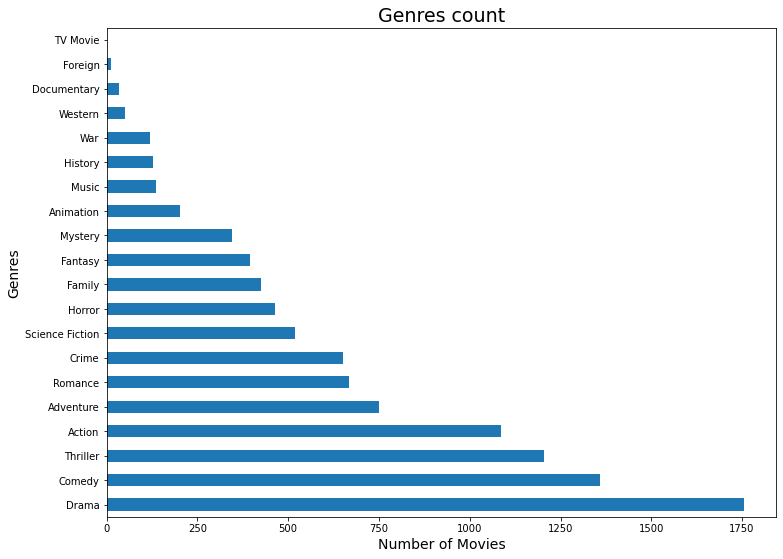

In [15]:
genre_count = split_data(tmdb_movies_copy, 'genres', '|')
# plt.pie(genre_count);
chart = genre_count.plot(kind='barh', figsize=(12,9))
# set labels
chart.set_ylabel('Genres', fontsize='14')
chart.set_xlabel('Number of Movies', fontsize='14')
plt.title('Genres count', size=19)
# chart.figure.set_size_inchres(12,12)

> The chart above show that the top three (3) genres are Drama, Comedy and Thriller

### Question 2: What are the profitable Genres in respect to profitable movies?

> In this section we shall be making analysis of the profitable genres in respect to profitable movies. Since no unit of currency was mentioned in the dataset, we are considering the dollar since it is the most used international currency. 

> Also for a fair analysis, profitable movies to be considered will be those that made a profit above 50 million dollars. The profit is to be calculated by subtracting the budget injected in the movie from the revenue got from the movie

In [16]:
# Calculating the profit earned and adding a new column in the dataset
tmdb_movies_copy.insert(4, 'profits', tmdb_movies_copy['revenue'] - tmdb_movies_copy['budget'])

In [17]:
# Creating a dataframe with profits greater than 50 million
tmdb_movies_profits = tmdb_movies_copy[tmdb_movies_copy['profits'] >= 50000000]
# Checking if the profits dataframe matches the intended conditions
tmdb_movies_profits.head()

,id,popularity,budget,revenue,profits,genres,release_year,revenue_adj
0,135397,32.985763,150000000.0,1.513529e+09,1.363529e+09,Action|Adventure|Science Fiction|Thriller,2015,1.392446e+09
1,76341,28.419936,150000000.0,3.784364e+08,2.284364e+08,Action|Adventure|Science Fiction|Thriller,2015,3.481613e+08
2,262500,13.112507,110000000.0,2.952382e+08,1.852382e+08,Adventure|Science Fiction|Thriller,2015,2.716190e+08
3,140607,11.173104,200000000.0,2.068178e+09,1.868178e+09,Action|Adventure|Science Fiction|Fantasy,2015,1.902723e+09
4,168259,9.335014,190000000.0,1.506249e+09,1.316249e+09,Action|Crime|Thriller,2015,1.385749e+09


In [18]:
# Reindexing the tmdb_movies_profits dataframe
tmdb_movies_profits.index = range(len(tmdb_movies_profits))
# changing the index to start at 1 off 0
tmdb_movies_profits.index = tmdb_movies_profits.index + 1
# verifying change
tmdb_movies_profits.head()

,id,popularity,budget,revenue,profits,genres,release_year,revenue_adj
1,135397,32.985763,150000000.0,1.513529e+09,1.363529e+09,Action|Adventure|Science Fiction|Thriller,2015,1.392446e+09
2,76341,28.419936,150000000.0,3.784364e+08,2.284364e+08,Action|Adventure|Science Fiction|Thriller,2015,3.481613e+08
3,262500,13.112507,110000000.0,2.952382e+08,1.852382e+08,Adventure|Science Fiction|Thriller,2015,2.716190e+08
4,140607,11.173104,200000000.0,2.068178e+09,1.868178e+09,Action|Adventure|Science Fiction|Fantasy,2015,1.902723e+09
5,168259,9.335014,190000000.0,1.506249e+09,1.316249e+09,Action|Crime|Thriller,2015,1.385749e+09


> In the above sections, we created a dataframe of movies which made profits more than 50 million dollars. We reindexed the data to start from 1 instead 0, this is to allow non programmers to follow up with a better index

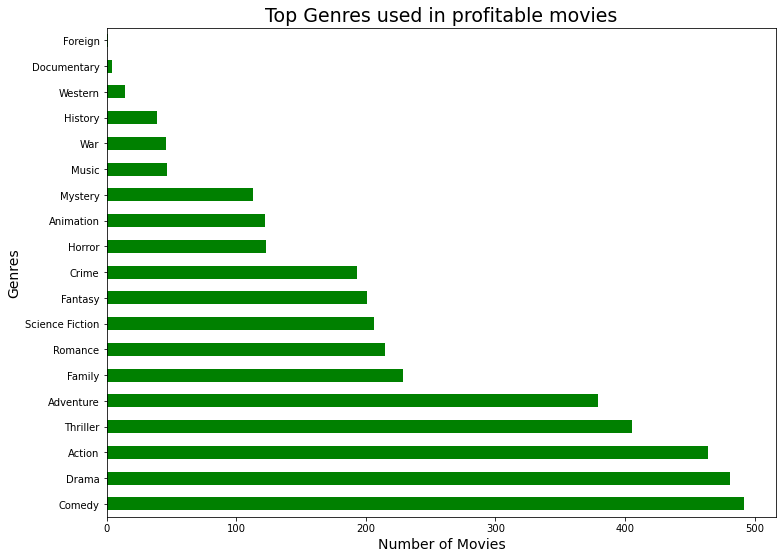

In [19]:
# Splitting the genres based on the tmdb_movies_profits dataframe
genre_profits_count = split_data(tmdb_movies_profits, 'genres', '|')
# plt.pie(genre_count);
chart = genre_profits_count.plot(kind='barh', color='green', figsize=(12,9))
# set labels
chart.set_ylabel('Genres', fontsize='14')
chart.set_xlabel('Number of Movies', fontsize='14')
plt.title('Top Genres used in profitable movies', size=19);
# chart.figure.set_size_inchres(12,12)

> The above chart shows that the Top 3 genres used in the profitable movies are Comedy, Drama and Action and it can also be concluded that Comedy movies are highly profitable movies.

<a id='conclusions'></a>
## Conclusions

I have really enjoyed working on this dataset given the fact that it was about Entertainment which I really love. Interesting conclusions have been made from this analysis as listed below.
<ul>
<li> Successfull movies have Genres of; Comedy, Action, Drama and Thriller</li>
<li> Comedy movies are the most profitable movies </li>
</ul>

<a id='limitations'></a>
## Limitations

Below are some of the limitations experienced in making this analysis
<ul>
<li> A partial analysis was carried out considering only movies which made profits above 50 million dollars.</li>
<li> A unit of currency was not provided in the budget and revenue columns which made it a lot hard since some of the movies budgets and revenue could be in different currency depending on their country of origin.</li>
<li> A lot of rows with zero values and missing values in the budget and revenue were removed which had a big impact on the overall analysis of dataset</li>
</ul>